In [ ]:
!pip install -Uqq fastbook
import fastbook
fastbook.setup_book()

In [ ]:
from fastai.vision.all import *
from fastbook import *

In [ ]:
path = Path("/content/gdrive/MyDrive/Training")

In [ ]:
path.ls()

(#2) [Path('/content/gdrive/MyDrive/Training/AD'),Path('/content/gdrive/MyDrive/Training/CN')]

In [ ]:
train_fnames = get_image_files(path)

In [ ]:
item_tfms = Resize(256)
batch_tfms = aug_transforms=[Normalize.from_stats(*imagenet_stats)]

In [ ]:
braindb = DataBlock(blocks=(ImageBlock,CategoryBlock),
                  get_items= get_image_files,
                  get_y = parent_label,
                  splitter =RandomSplitter(valid_pct= 0.3, seed = 42),
                  item_tfms = item_tfms,
                  batch_tfms = batch_tfms
                  )
dls = braindb.dataloaders(path,bs=16)

In [ ]:
learn = cnn_learner(dls, xresnet50, metrics=[accuracy,error_rate])

SuggestedLRs(lr_min=0.001096478197723627, lr_steep=1.0964781722577754e-06)

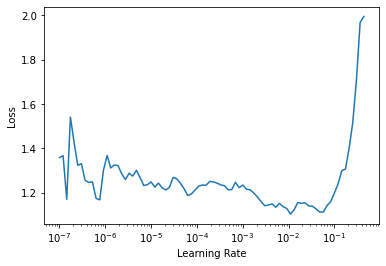

In [ ]:
learn.lr_find()

In [ ]:
learn.fine_tune(50,1.2e-2)

epoch,train_loss,valid_loss,accuracy,error_rate,time
0,1.649699,1.145129,0.441667,0.558333,00:35


epoch,train_loss,valid_loss,accuracy,error_rate,time
0,0.960826,1.011750,0.491667,0.508333,00:36
1,0.801968,0.868959,0.591667,0.408333,00:36
2,0.681737,0.678523,0.708333,0.291667,00:36
3,0.546293,0.891368,0.616667,0.383333,00:36
4,0.445426,1.385078,0.575000,0.425000,00:36
5,0.378332,1.135632,0.641667,0.358333,00:36
6,0.332661,1.069165,0.625000,0.375000,00:36
7,0.352053,5.404328,0.450000,0.550000,00:36
8,0.412527,1.171625,0.600000,0.400000,00:36
9,0.462062,1.998136,0.575000,0.425000,00:37


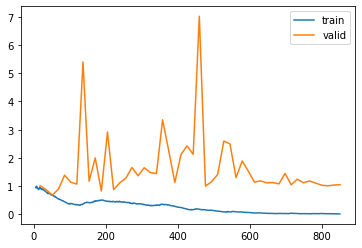

In [ ]:
learn.recorder.plot_loss()

In [ ]:
learn.unfreeze()

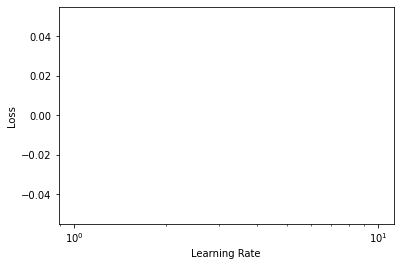

In [ ]:
learn.lr_find()

In [ ]:
learn.fit_one_cycle(25,1e-3)

epoch,train_loss,valid_loss,accuracy,error_rate,time
0,0.002468,1.064731,0.783333,0.216667,00:36
1,0.005838,1.285300,0.733333,0.266667,00:36
2,0.047773,3.115398,0.600000,0.400000,00:36
3,0.066867,9.311282,0.458333,0.541667,00:36
4,0.146174,4.227685,0.491667,0.508333,00:36
5,0.210426,14.626182,0.541667,0.458333,00:36
6,0.251899,3.320041,0.550000,0.450000,00:36
7,0.200919,1.144791,0.750000,0.250000,00:36
8,0.169651,6.108693,0.458333,0.541667,00:36
9,0.130485,2.321074,0.666667,0.333333,00:36


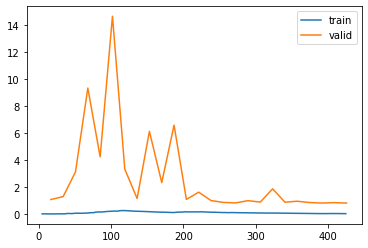

In [ ]:
learn.recorder.plot_loss()

In [ ]:
interp= ClassificationInterpretation.from_learner(learn)

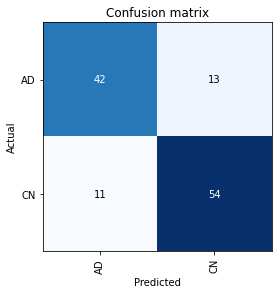

In [ ]:
interp.plot_confusion_matrix()

In [ ]:
interp.print_classification_report()

              precision    recall  f1-score   support

          AD       0.79      0.76      0.78        55
          CN       0.81      0.83      0.82        65

    accuracy                           0.80       120
   macro avg       0.80      0.80      0.80       120
weighted avg       0.80      0.80      0.80       120

